In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

import pandas, seaborn, numpy, collections, sefara, varcode, uncertainties, numpy, statsmodels, pickle, scipy
%matplotlib inline
from matplotlib import pyplot
import topiary
import mhctools
import matplotlib_venn
import intervaltree
import statsmodels.robust
import mhcflurry
from varcode.common import memoize
pandas.set_option('display.max_columns', None)
import scipy, sys, sklearn
import sklearn.utils
import matplotlib
#import common as c
import sklearn.tree
import pymc3
from scipy import optimize
import glob


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

import pystan
import pyfaidx



/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [14]:
counts_df = pandas.read_csv("../data/chicken_mutation_counts_trinucleotide.csv", skiprows=4).dropna()
counts_df

,Treatment,Clone,Total,ACA>AAA,ACC>AAC,ACG>AAG,ACT>AAT,CCA>CAA,CCC>CAC,CCG>CAG,CCT>CAT,GCA>GAA,GCC>GAC,GCG>GAG,GCT>GAT,TCA>TAA,TCC>TAC,TCG>TAG,TCT>TAT,ACA>AGA,ACC>AGC,ACG>AGG,ACT>AGT,CCA>CGA,CCC>CGC,CCG>CGG,CCT>CGT,GCA>GGA,GCC>GGC,GCG>GGG,GCT>GGT,TCA>TGA,TCC>TGC,TCG>TGG,TCT>TGT,ACA>ATA,ACC>ATC,ACG>ATG,ACT>ATT,CCA>CTA,CCC>CTC,CCG>CTG,CCT>CTT,GCA>GTA,GCC>GTC,GCG>GTG,GCT>GTT,TCA>TTA,TCC>TTC,TCG>TTG,TCT>TTT,ATA>AAA,ATC>AAC,ATG>AAG,ATT>AAT,CTA>CAA,CTC>CAC,CTG>CAG,CTT>CAT,GTA>GAA,GTC>GAC,GTG>GAG,GTT>GAT,TTA>TAA,TTC>TAC,TTG>TAG,TTT>TAT,ATA>ACA,ATC>ACC,ATG>ACG,ATT>ACT,CTA>CCA,CTC>CCC,CTG>CCG,CTT>CCT,GTA>GCA,GTC>GCC,GTG>GCG,GTT>GCT,TTA>TCA,TTC>TCC,TTG>TCG,TTT>TCT,ATA>AGA,ATC>AGC,ATG>AGG,ATT>AGT,CTA>CGA,CTC>CGC,CTG>CGG,CTT>CGT,GTA>GGA,GTC>GGC,GTG>GGG,GTT>GGT,TTA>TGA,TTC>TGC,TTG>TGG,TTT>TGT
1,starting clone,Clone 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,mock,Clone 1,75,0,0,1,0,0,0,0,0,3,2,0,3,6,1,0,1,2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,2,2,0,3,1,0,2,1,1,1,0,4,0,1,2,3,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,2,1,1,1,0,0,0,1,1,1,0,1,0,2,2,1,0,1,0,0,1,1,0,0,0,2,1,0,0,0
3,mock,Clone 2,46,2,0,0,2,1,1,0,0,1,2,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,0,1,0,0,2,0,0,2,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,1,2,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,mock,Clone 3,46,0,0,0,2,1,0,0,0,2,0,0,0,1,1,0,2,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,1,1,0,0,1,1,0,0,0,0,2,2,1,2,1,1,1,0,0,0,0,1,1,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,mock,Clone 4,30,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,2,0,1,1,1,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,2,0,2,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,cisplatin,Clone 1,591,4,62,1,18,9,45,0,9,5,70,2,16,6,66,0,24,1,3,0,3,3,1,0,0,4,4,0,1,1,1,1,2,1,1,1,0,1,4,1,2,4,3,3,6,3,3,2,13,4,24,2,2,11,8,10,13,1,13,0,2,2,13,4,6,2,4,2,2,0,2,2,4,1,5,0,4,0,1,2,2,1,1,4,2,1,1,7,5,0,0,3,0,0,0,4,4
7,cisplatin,Clone 2,900,1,80,0,22,17,46,1,17,16,121,2,23,7,112,1,30,5,2,0,7,3,2,2,3,4,7,0,3,5,4,1,7,6,4,2,2,4,5,1,3,6,7,3,10,5,16,1,4,4,44,4,4,18,14,24,10,2,18,3,2,8,13,3,2,3,3,1,1,6,4,11,5,1,2,0,2,3,7,1,1,2,1,4,0,6,1,14,1,0,1,4,4,3,0,4,1
8,cisplatin,Clone 3,945,11,84,0,22,23,51,1,23,10,112,1,31,9,128,1,48,3,1,0,1,4,4,0,4,6,10,1,1,3,5,2,8,1,9,1,4,7,8,2,11,7,7,1,8,3,7,3,14,6,35,4,3,20,14,16,16,1,8,0,5,5,7,5,4,2,4,0,3,1,8,6,10,3,0,2,2,1,1,2,5,2,1,6,0,4,2,11,1,0,3,6,2,0,1,5,1
9,cyclophosphamide,Clone 1,239,2,2,0,1,0,1,0,2,3,1,0,0,4,0,0,5,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,7,3,11,3,9,2,8,4,9,1,6,0,3,3,8,2,0,3,7,2,3,10,19,2,1,3,5,8,1,4,19,2,3,1,1,2,0,0,4,2,2,0,4,0,1,0,4,1,2,0,2,3,0,2,3,0,0,0,0,3,1,0,3
10,cyclophosphamide,Clone 2,309,1,1,0,7,1,1,1,3,0,0,1,3,0,2,0,3,2,1,0,1,0,0,0,0,1,0,0,5,0,1,0,1,6,5,0,1,5,11,2,1,2,6,2,5,5,6,1,5,5,4,6,12,5,11,13,38,4,2,4,9,9,3,9,14,0,1,2,4,0,2,1,4,2,2,3,7,2,0,3,6,1,1,1,0,5,0,0,8,0,0,0,1,0,2,1,3


In [77]:
treatment_sums = counts_df.groupby("Treatment").sum()
del treatment_sums["Total"]
treatment_sums

,ACA>AAA,ACC>AAC,ACG>AAG,ACT>AAT,CCA>CAA,CCC>CAC,CCG>CAG,CCT>CAT,GCA>GAA,GCC>GAC,GCG>GAG,GCT>GAT,TCA>TAA,TCC>TAC,TCG>TAG,TCT>TAT,ACA>AGA,ACC>AGC,ACG>AGG,ACT>AGT,CCA>CGA,CCC>CGC,CCG>CGG,CCT>CGT,GCA>GGA,GCC>GGC,GCG>GGG,GCT>GGT,TCA>TGA,TCC>TGC,TCG>TGG,TCT>TGT,ACA>ATA,ACC>ATC,ACG>ATG,ACT>ATT,CCA>CTA,CCC>CTC,CCG>CTG,CCT>CTT,GCA>GTA,GCC>GTC,GCG>GTG,GCT>GTT,TCA>TTA,TCC>TTC,TCG>TTG,TCT>TTT,ATA>AAA,ATC>AAC,ATG>AAG,ATT>AAT,CTA>CAA,CTC>CAC,CTG>CAG,CTT>CAT,GTA>GAA,GTC>GAC,GTG>GAG,GTT>GAT,TTA>TAA,TTC>TAC,TTG>TAG,TTT>TAT,ATA>ACA,ATC>ACC,ATG>ACG,ATT>ACT,CTA>CCA,CTC>CCC,CTG>CCG,CTT>CCT,GTA>GCA,GTC>GCC,GTG>GCG,GTT>GCT,TTA>TCA,TTC>TCC,TTG>TCG,TTT>TCT,ATA>AGA,ATC>AGC,ATG>AGG,ATT>AGT,CTA>CGA,CTC>CGC,CTG>CGG,CTT>CGT,GTA>GGA,GTC>GGC,GTG>GGG,GTT>GGT,TTA>TGA,TTC>TGC,TTG>TGG,TTT>TGT
Treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5-fluorouracil,3,1,1,1,3,3,0,1,2,1,1,7,3,4,0,6,4,1,0,2,1,1,0,2,1,0,0,3,0,0,0,2,1,1,4,4,1,1,2,2,4,1,1,1,0,3,3,2,1,2,1,1,2,1,1,1,0,1,0,2,0,1,1,1,2,3,3,4,2,1,4,5,1,2,2,3,2,0,1,1,2,0,0,1,0,0,0,1,2,0,0,0,1,1,0,5
cisplatin,16,226,1,62,49,142,2,49,31,303,5,70,22,306,2,102,9,6,0,11,10,7,2,7,14,21,1,5,9,10,4,17,8,14,4,6,12,17,4,16,17,17,7,24,11,26,6,31,14,103,10,9,49,36,50,39,4,39,3,9,15,33,12,12,7,11,3,6,7,14,19,19,5,7,2,8,4,9,5,8,5,3,14,2,11,4,32,7,0,4,13,6,3,1,13,6
cyclophosphamide,5,4,0,10,3,2,1,5,3,1,1,4,7,3,0,10,3,1,0,3,1,0,0,0,2,0,0,6,1,5,0,3,12,18,4,16,10,27,7,14,7,17,5,15,6,13,4,20,8,7,12,21,12,18,32,72,13,4,9,21,22,7,14,44,3,6,8,8,3,4,4,12,4,5,3,16,3,2,4,13,2,3,3,3,9,2,5,16,2,1,1,2,4,5,1,9
doxorubicin,3,2,0,2,2,0,0,1,2,0,0,1,6,1,1,7,4,2,0,1,1,0,0,2,1,0,0,1,1,1,1,1,1,1,1,1,0,2,1,0,2,1,0,3,3,4,4,1,1,1,1,0,1,1,0,1,2,0,2,1,4,1,2,2,1,2,3,2,0,0,4,2,0,1,1,3,1,3,1,5,1,1,3,1,0,0,0,3,0,0,0,1,0,1,1,2
etoposide,5,2,1,3,4,0,1,2,8,2,0,4,7,5,1,8,7,0,1,3,1,0,1,1,2,0,1,2,1,0,0,3,3,5,11,3,4,1,8,2,6,5,11,8,1,3,4,2,2,2,0,1,0,4,3,6,2,3,2,5,2,2,1,3,4,5,6,12,3,3,2,10,4,3,4,3,0,2,0,8,0,0,1,3,2,1,2,1,1,1,1,2,5,0,2,3
gemcitabine,3,3,0,1,2,0,0,1,2,0,1,3,7,1,0,3,7,1,0,3,0,0,0,0,0,0,0,3,4,5,0,0,4,0,3,2,1,1,4,1,4,3,3,2,3,1,2,4,0,0,1,1,0,2,1,2,1,1,1,1,1,1,0,1,3,2,5,6,0,1,0,2,1,3,4,4,3,1,5,2,1,1,1,4,0,0,4,4,0,0,1,2,2,3,1,3
hydroxyurea,5,1,0,1,0,1,0,3,4,2,0,5,6,5,0,7,2,2,0,2,4,1,0,0,1,1,0,0,1,1,0,3,5,2,7,1,2,5,2,2,6,3,8,6,3,0,2,4,3,5,0,3,1,2,0,0,0,1,0,0,3,1,0,1,6,5,7,4,0,4,5,4,1,3,3,7,3,4,0,7,1,1,1,2,0,0,3,3,1,0,1,2,2,1,1,4
mock,2,0,1,6,2,1,0,1,6,5,0,3,8,2,0,8,3,2,0,2,0,0,0,1,1,0,0,1,2,0,0,4,6,2,7,3,1,4,3,2,3,2,5,3,6,3,7,1,1,2,0,2,2,1,3,3,1,2,1,2,3,0,1,2,5,0,2,3,1,3,2,2,2,3,2,4,1,1,1,5,3,2,1,2,0,0,1,1,0,0,0,2,1,0,0,2
paclitaxel,1,1,0,0,4,1,0,3,4,2,1,1,7,0,0,4,2,2,0,2,2,1,0,3,2,0,0,2,0,2,0,4,5,2,9,1,4,1,2,2,3,0,4,3,0,3,5,3,2,2,3,6,0,0,1,4,1,1,0,1,6,2,0,2,5,4,6,4,5,2,3,4,0,6,1,2,2,3,0,0,0,1,0,1,1,0,2,1,0,1,0,2,2,0,2,2


In [88]:
treatment_sums_minus_control = (treatment_sums - treatment_sums.ix["mock"]).applymap(lambda x: max(x, 0))
treatment_sums_minus_control

,ACA>AAA,ACC>AAC,ACG>AAG,ACT>AAT,CCA>CAA,CCC>CAC,CCG>CAG,CCT>CAT,GCA>GAA,GCC>GAC,GCG>GAG,GCT>GAT,TCA>TAA,TCC>TAC,TCG>TAG,TCT>TAT,ACA>AGA,ACC>AGC,ACG>AGG,ACT>AGT,CCA>CGA,CCC>CGC,CCG>CGG,CCT>CGT,GCA>GGA,GCC>GGC,GCG>GGG,GCT>GGT,TCA>TGA,TCC>TGC,TCG>TGG,TCT>TGT,ACA>ATA,ACC>ATC,ACG>ATG,ACT>ATT,CCA>CTA,CCC>CTC,CCG>CTG,CCT>CTT,GCA>GTA,GCC>GTC,GCG>GTG,GCT>GTT,TCA>TTA,TCC>TTC,TCG>TTG,TCT>TTT,ATA>AAA,ATC>AAC,ATG>AAG,ATT>AAT,CTA>CAA,CTC>CAC,CTG>CAG,CTT>CAT,GTA>GAA,GTC>GAC,GTG>GAG,GTT>GAT,TTA>TAA,TTC>TAC,TTG>TAG,TTT>TAT,ATA>ACA,ATC>ACC,ATG>ACG,ATT>ACT,CTA>CCA,CTC>CCC,CTG>CCG,CTT>CCT,GTA>GCA,GTC>GCC,GTG>GCG,GTT>GCT,TTA>TCA,TTC>TCC,TTG>TCG,TTT>TCT,ATA>AGA,ATC>AGC,ATG>AGG,ATT>AGT,CTA>CGA,CTC>CGC,CTG>CGG,CTT>CGT,GTA>GGA,GTC>GGC,GTG>GGG,GTT>GGT,TTA>TGA,TTC>TGC,TTG>TGG,TTT>TGT
Treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5-fluorouracil,1,1,0,0,1,2,0,0,0,0,1,4,0,2,0,0,1,0,0,0,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,1,0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,3
cisplatin,14,226,0,56,47,141,2,48,25,298,5,67,14,304,2,94,6,4,0,9,10,7,2,6,13,21,1,4,7,10,4,13,2,12,0,3,11,13,1,14,14,15,2,21,5,23,0,30,13,101,10,7,47,35,47,36,3,37,2,7,12,33,11,10,2,11,1,3,6,11,17,17,3,4,0,4,3,8,4,3,2,1,13,0,11,4,31,6,0,4,13,4,2,1,13,4
cyclophosphamide,3,4,0,4,1,1,1,4,0,0,1,1,0,1,0,2,0,0,0,1,1,0,0,0,1,0,0,5,0,5,0,0,6,16,0,13,9,23,4,12,4,15,0,12,0,10,0,19,7,5,12,19,10,17,29,69,12,2,8,19,19,7,13,42,0,6,6,5,2,1,2,10,2,2,1,12,2,1,3,8,0,1,2,1,9,2,4,15,2,1,1,0,3,5,1,7
doxorubicin,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,2,1,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,1,1,0
etoposide,3,2,0,0,2,0,1,1,2,0,0,1,0,3,1,0,4,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,3,4,0,3,0,5,0,3,3,6,5,0,0,0,1,1,0,0,0,0,3,0,3,1,1,1,3,0,2,0,1,0,5,4,9,2,0,0,8,2,0,2,0,0,1,0,3,0,0,0,1,2,1,1,0,1,1,1,0,4,0,2,1
gemcitabine,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,2,2,5,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,3,3,0,0,0,0,0,0,2,0,2,0,4,0,0,0,0,2,0,0,3,3,0,0,1,0,1,3,1,1
hydroxyurea,3,1,0,0,0,0,0,2,0,0,0,2,0,3,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,3,1,3,3,0,0,0,3,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5,5,1,0,1,3,2,0,0,1,3,2,3,0,2,0,0,0,0,0,0,2,2,1,0,1,0,1,1,1,2
mock,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
paclitaxel,0,1,0,0,2,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,2,1,0,0,1,0,2,0,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,2,1,0,3,4,0,0,0,1,0,0,0,0,3,2,0,0,0,4,4,1,4,0,1,2,0,3,0,0,1,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,2,0


In [89]:
treatment_sums_minus_control.sum(1)

Treatment
5-fluorouracil        41
cisplatin           2243
cyclophosphamide     586
doxorubicin           29
etoposide            127
gemcitabine           59
hydroxyurea           81
mock                   0
paclitaxel            64
starting clone         0
dtype: float64

In [90]:
frequencies_df = pandas.read_csv("../data/chicken_trinucleotide_frequencies.csv", skiprows=4, index_col=0)
frequencies_df = frequencies_df[list(frequencies_df.columns)[:3]].dropna()
frequencies_df

,Gallus gallus,Homo sapiens,Human/chicken ratio
ACA,0.043165,0.040337,0.934463
ACC,0.021226,0.023258,1.095771
ACG,0.006771,0.005026,0.742237
ACT,0.033155,0.032173,0.970397
CCA,0.033537,0.036888,1.099896
CCC,0.023988,0.026295,1.096168
CCG,0.005774,0.005522,0.956355
CCT,0.033154,0.035518,1.071318
GCA,0.037486,0.028803,0.768365
GCC,0.020606,0.023797,1.154847


In [91]:
human_rates = pandas.DataFrame([
        row * frequencies_df.ix[change.split(">")[0]]["Human/chicken ratio"]
        for (change, row) in treatment_sums_minus_control.T.iterrows()
])
del human_rates["starting clone"]
human_rates /= human_rates.sum(0)
human_rates

Treatment,5-fluorouracil,cisplatin,cyclophosphamide,doxorubicin,etoposide,gemcitabine,hydroxyurea,mock,paclitaxel
ACA>AAA,0.023468,0.005669,0.004764,0.032743,0.022567,0.016039,0.035092,NaN,0.000000
ACC>AAC,0.027520,0.107313,0.007449,0.076789,0.017642,0.056424,0.013717,NaN,0.016809
ACG>AAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
ACT>AAT,0.000000,0.023548,0.006596,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
CCA>CAA,0.027623,0.022401,0.001869,0.000000,0.017708,0.000000,0.000000,NaN,0.033745
CCC>CAC,0.055059,0.066976,0.001863,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
CCG>CAG,0.000000,0.000829,0.001625,0.000000,0.007699,0.000000,0.000000,NaN,0.000000
CCT>CAT,0.000000,0.022283,0.007282,0.000000,0.008624,0.000000,0.026821,NaN,0.032868
GCA>GAA,0.000000,0.008324,0.000000,0.000000,0.012371,0.000000,0.000000,NaN,0.000000
GCC>GAC,0.000000,0.149130,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [92]:
cosmic_signatures = pandas.read_table("../data/signatures_probabilities.txt", index_col="Somatic Mutation Type")
del cosmic_signatures["Substitution Type"]
del cosmic_signatures["Trinucleotide"]
cosmic_signatures = cosmic_signatures.dropna(1)
cosmic_signatures

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30
Somatic Mutation Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.011098,6.827082e-04,0.022172,0.0365,0.014942,0.0017,0.0004,0.036718,0.0120,0.0007,0.0002,0.0077,3.347572e-04,0.0001,0.0013,0.0161,0.001832,5.053642e-02,0.0107,1.179962e-03,0.0001,0.001504,0.000453,0.028646,0.009897,2.039773e-03,0.005206,0.001397,0.069982,0.000000
A[C>A]C,0.009149,6.191072e-04,0.017872,0.0309,0.008961,0.0028,0.0005,0.033246,0.0067,0.0010,0.0010,0.0047,6.487361e-04,0.0042,0.0040,0.0097,0.000342,1.093982e-02,0.0074,2.211505e-03,0.0007,0.002451,0.000367,0.020215,0.006999,1.487162e-03,0.004738,0.000917,0.055152,0.000000
A[C>A]G,0.001490,9.927896e-05,0.002138,0.0183,0.002208,0.0005,0.0000,0.002525,0.0005,0.0003,0.0000,0.0017,3.814459e-05,0.0005,0.0000,0.0022,0.000002,2.288073e-03,0.0005,1.616910e-07,0.0000,0.000000,0.000000,0.020479,0.001448,2.839456e-04,0.000783,0.000000,0.017847,0.001967
A[C>A]T,0.006234,3.238914e-04,0.016265,0.0243,0.009207,0.0019,0.0004,0.033599,0.0068,0.0092,0.0002,0.0046,8.466585e-04,0.0296,0.0057,0.0088,0.003180,1.942409e-02,0.0074,3.008010e-03,0.0006,0.000922,0.000000,0.024600,0.004967,5.978656e-04,0.002718,0.000513,0.026805,0.000000
A[C>G]A,0.001801,2.634810e-04,0.024003,0.0097,0.011671,0.0013,0.0000,0.008357,0.0048,0.0005,0.0007,0.0031,3.775165e-03,0.0001,0.0011,0.0048,0.001662,1.516888e-03,0.0058,6.970411e-04,0.0005,0.000528,0.000000,0.011993,0.008033,1.272881e-03,0.001324,0.000255,0.009302,0.000000
A[C>G]C,0.002581,2.698660e-04,0.012160,0.0054,0.007292,0.0012,0.0000,0.004306,0.0023,0.0003,0.0003,0.0015,9.208248e-04,0.0000,0.0001,0.0024,0.001627,2.498785e-03,0.0019,2.059310e-03,0.0008,0.000000,0.000000,0.008425,0.001636,1.528195e-03,0.001771,0.000269,0.003479,0.000000
A[C>G]G,0.000593,2.192339e-04,0.005275,0.0031,0.002304,0.0000,0.0000,0.000584,0.0000,0.0000,0.0000,0.0000,1.989049e-05,0.0000,0.0006,0.0000,0.000026,2.614509e-03,0.0000,1.273496e-05,0.0000,0.000000,0.000000,0.000000,0.000000,3.072463e-04,0.000000,0.000000,0.000154,0.004820
A[C>G]T,0.002964,6.109735e-04,0.023278,0.0054,0.011696,0.0018,0.0001,0.008635,0.0038,0.0002,0.0009,0.0025,3.860632e-03,0.0001,0.0010,0.0073,0.001329,3.983011e-03,0.0072,8.485871e-04,0.0018,0.000299,0.000000,0.003881,0.003428,2.498252e-03,0.001323,0.000308,0.003977,0.000000
A[C>T]A,0.029515,7.441557e-03,0.017872,0.0120,0.021839,0.0312,0.0000,0.018067,0.0093,0.0000,0.0225,0.0121,1.480181e-03,0.0293,0.0117,0.0135,0.009350,3.825624e-03,0.0221,3.285805e-02,0.0051,0.003113,0.019767,0.006316,0.020988,5.907232e-03,0.013723,0.005434,0.005197,0.065119


In [93]:
def canonicalize(x):
    (first, second) = x.split(">")
    assert len(first) == len(second) == 3
    assert first[0] == second[0]
    assert first[2] == second[2]
    return "%s[%s>%s]%s" % (first[0], first[1], second[1], first[2])

all_signatures = cosmic_signatures.copy()
human_rates_canonicalized = human_rates.copy()
human_rates_canonicalized.index = [canonicalize(x) for x in human_rates_canonicalized.index]
for col in ["cisplatin", "cyclophosphamide", "etoposide"]:
    all_signatures["Chicken %s" % col] = human_rates_canonicalized[col]
all_signatures

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Chicken cisplatin,Chicken cyclophosphamide,Chicken etoposide
Somatic Mutation Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.011098,6.827082e-04,0.022172,0.0365,0.014942,0.0017,0.0004,0.036718,0.0120,0.0007,0.0002,0.0077,3.347572e-04,0.0001,0.0013,0.0161,0.001832,5.053642e-02,0.0107,1.179962e-03,0.0001,0.001504,0.000453,0.028646,0.009897,2.039773e-03,0.005206,0.001397,0.069982,0.000000,0.005669,0.004764,0.022567
A[C>A]C,0.009149,6.191072e-04,0.017872,0.0309,0.008961,0.0028,0.0005,0.033246,0.0067,0.0010,0.0010,0.0047,6.487361e-04,0.0042,0.0040,0.0097,0.000342,1.093982e-02,0.0074,2.211505e-03,0.0007,0.002451,0.000367,0.020215,0.006999,1.487162e-03,0.004738,0.000917,0.055152,0.000000,0.107313,0.007449,0.017642
A[C>A]G,0.001490,9.927896e-05,0.002138,0.0183,0.002208,0.0005,0.0000,0.002525,0.0005,0.0003,0.0000,0.0017,3.814459e-05,0.0005,0.0000,0.0022,0.000002,2.288073e-03,0.0005,1.616910e-07,0.0000,0.000000,0.000000,0.020479,0.001448,2.839456e-04,0.000783,0.000000,0.017847,0.001967,0.000000,0.000000,0.000000
A[C>A]T,0.006234,3.238914e-04,0.016265,0.0243,0.009207,0.0019,0.0004,0.033599,0.0068,0.0092,0.0002,0.0046,8.466585e-04,0.0296,0.0057,0.0088,0.003180,1.942409e-02,0.0074,3.008010e-03,0.0006,0.000922,0.000000,0.024600,0.004967,5.978656e-04,0.002718,0.000513,0.026805,0.000000,0.023548,0.006596,0.000000
A[C>G]A,0.001801,2.634810e-04,0.024003,0.0097,0.011671,0.0013,0.0000,0.008357,0.0048,0.0005,0.0007,0.0031,3.775165e-03,0.0001,0.0011,0.0048,0.001662,1.516888e-03,0.0058,6.970411e-04,0.0005,0.000528,0.000000,0.011993,0.008033,1.272881e-03,0.001324,0.000255,0.009302,0.000000,0.002430,0.000000,0.030089
A[C>G]C,0.002581,2.698660e-04,0.012160,0.0054,0.007292,0.0012,0.0000,0.004306,0.0023,0.0003,0.0003,0.0015,9.208248e-04,0.0000,0.0001,0.0024,0.001627,2.498785e-03,0.0019,2.059310e-03,0.0008,0.000000,0.000000,0.008425,0.001636,1.528195e-03,0.001771,0.000269,0.003479,0.000000,0.001899,0.000000,0.000000
A[C>G]G,0.000593,2.192339e-04,0.005275,0.0031,0.002304,0.0000,0.0000,0.000584,0.0000,0.0000,0.0000,0.0000,1.989049e-05,0.0000,0.0006,0.0000,0.000026,2.614509e-03,0.0000,1.273496e-05,0.0000,0.000000,0.000000,0.000000,0.000000,3.072463e-04,0.000000,0.000000,0.000154,0.004820,0.000000,0.000000,0.005975
A[C>G]T,0.002964,6.109735e-04,0.023278,0.0054,0.011696,0.0018,0.0001,0.008635,0.0038,0.0002,0.0009,0.0025,3.860632e-03,0.0001,0.0010,0.0073,0.001329,3.983011e-03,0.0072,8.485871e-04,0.0018,0.000299,0.000000,0.003881,0.003428,2.498252e-03,0.001323,0.000308,0.003977,0.000000,0.003785,0.001649,0.007812
A[C>T]A,0.029515,7.441557e-03,0.017872,0.0120,0.021839,0.0312,0.0000,0.018067,0.0093,0.0000,0.0225,0.0121,1.480181e-03,0.0293,0.0117,0.0135,0.009350,3.825624e-03,0.0221,3.285805e-02,0.0051,0.003113,0.019767,0.006316,0.020988,5.907232e-03,0.013723,0.005434,0.005197,0.065119,0.000810,0.009528,0.000000


In [94]:
# Add C. Elegans cisplatin signature
c_elegans_unit_normalized = pandas.read_csv("../data/c_elegans_cisplatin_rates_unit_normalized.csv", index_col=0)
c_elegans_unit_normalized.index = [x.replace("(", "[").replace(")", "]") for x in c_elegans_unit_normalized.index]
all_signatures["C Elegans Cisplatin"] = pandas.Series([
    frequencies_df.ix[substitution[0] + substitution[2] + substitution[-1]]["Homo sapiens"] * row.fully_normalized_fraction
    for (substitution, row) in c_elegans_unit_normalized.iterrows()
], index=c_elegans_unit_normalized.index)
all_signatures["C Elegans Cisplatin"] /= all_signatures["C Elegans Cisplatin"].sum()
all_signatures

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Chicken cisplatin,Chicken cyclophosphamide,Chicken etoposide,C Elegans Cisplatin
Somatic Mutation Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.011098,6.827082e-04,0.022172,0.0365,0.014942,0.0017,0.0004,0.036718,0.0120,0.0007,0.0002,0.0077,3.347572e-04,0.0001,0.0013,0.0161,0.001832,5.053642e-02,0.0107,1.179962e-03,0.0001,0.001504,0.000453,0.028646,0.009897,2.039773e-03,0.005206,0.001397,0.069982,0.000000,0.005669,0.004764,0.022567,0.000000
A[C>A]C,0.009149,6.191072e-04,0.017872,0.0309,0.008961,0.0028,0.0005,0.033246,0.0067,0.0010,0.0010,0.0047,6.487361e-04,0.0042,0.0040,0.0097,0.000342,1.093982e-02,0.0074,2.211505e-03,0.0007,0.002451,0.000367,0.020215,0.006999,1.487162e-03,0.004738,0.000917,0.055152,0.000000,0.107313,0.007449,0.017642,0.000000
A[C>A]G,0.001490,9.927896e-05,0.002138,0.0183,0.002208,0.0005,0.0000,0.002525,0.0005,0.0003,0.0000,0.0017,3.814459e-05,0.0005,0.0000,0.0022,0.000002,2.288073e-03,0.0005,1.616910e-07,0.0000,0.000000,0.000000,0.020479,0.001448,2.839456e-04,0.000783,0.000000,0.017847,0.001967,0.000000,0.000000,0.000000,0.000000
A[C>A]T,0.006234,3.238914e-04,0.016265,0.0243,0.009207,0.0019,0.0004,0.033599,0.0068,0.0092,0.0002,0.0046,8.466585e-04,0.0296,0.0057,0.0088,0.003180,1.942409e-02,0.0074,3.008010e-03,0.0006,0.000922,0.000000,0.024600,0.004967,5.978656e-04,0.002718,0.000513,0.026805,0.000000,0.023548,0.006596,0.000000,0.015304
A[C>G]A,0.001801,2.634810e-04,0.024003,0.0097,0.011671,0.0013,0.0000,0.008357,0.0048,0.0005,0.0007,0.0031,3.775165e-03,0.0001,0.0011,0.0048,0.001662,1.516888e-03,0.0058,6.970411e-04,0.0005,0.000528,0.000000,0.011993,0.008033,1.272881e-03,0.001324,0.000255,0.009302,0.000000,0.002430,0.000000,0.030089,0.000000
A[C>G]C,0.002581,2.698660e-04,0.012160,0.0054,0.007292,0.0012,0.0000,0.004306,0.0023,0.0003,0.0003,0.0015,9.208248e-04,0.0000,0.0001,0.0024,0.001627,2.498785e-03,0.0019,2.059310e-03,0.0008,0.000000,0.000000,0.008425,0.001636,1.528195e-03,0.001771,0.000269,0.003479,0.000000,0.001899,0.000000,0.000000,0.000000
A[C>G]G,0.000593,2.192339e-04,0.005275,0.0031,0.002304,0.0000,0.0000,0.000584,0.0000,0.0000,0.0000,0.0000,1.989049e-05,0.0000,0.0006,0.0000,0.000026,2.614509e-03,0.0000,1.273496e-05,0.0000,0.000000,0.000000,0.000000,0.000000,3.072463e-04,0.000000,0.000000,0.000154,0.004820,0.000000,0.000000,0.005975,0.000000
A[C>G]T,0.002964,6.109735e-04,0.023278,0.0054,0.011696,0.0018,0.0001,0.008635,0.0038,0.0002,0.0009,0.0025,3.860632e-03,0.0001,0.0010,0.0073,0.001329,3.983011e-03,0.0072,8.485871e-04,0.0018,0.000299,0.000000,0.003881,0.003428,2.498252e-03,0.001323,0.000308,0.003977,0.000000,0.003785,0.001649,0.007812,0.015304
A[C>T]A,0.029515,7.441557e-03,0.017872,0.0120,0.021839,0.0312,0.0000,0.018067,0.0093,0.0000,0.0225,0.0121,1.480181e-03,0.0293,0.0117,0.0135,0.009350,3.825624e-03,0.0221,3.285805e-02,0.0051,0.003113,0.019767,0.006316,0.020988,5.907232e-03,0.013723,0.005434,0.005197,0.065119,0.000810,0.009528,0.000000,0.000000


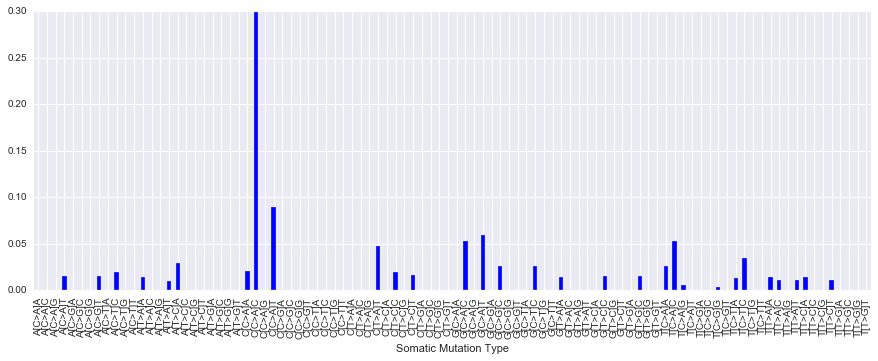

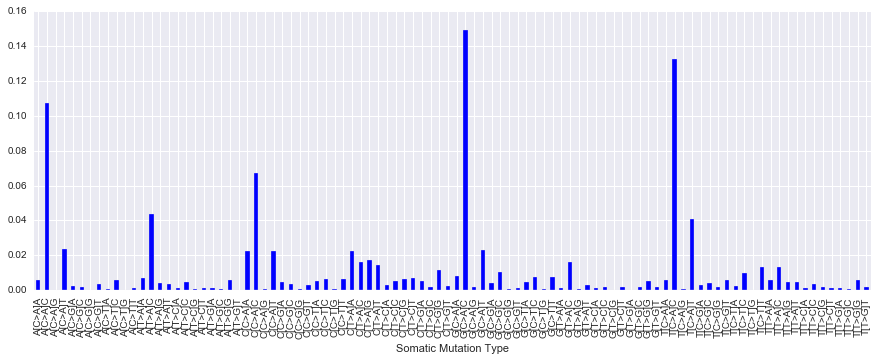

In [95]:
pyplot.figure(figsize=(15,5))
(all_signatures["C Elegans Cisplatin"]).plot(kind='bar')
pyplot.figure(figsize=(15,5))

(all_signatures["Chicken cisplatin"]).plot(kind='bar')

In [76]:
all_signatures.T.to_csv("../data/all_signatures_for_deconstructsigs_with_chicken.csv")

In [96]:
# Write out mutation counts

mutations = pandas.read_csv("../data/mutations.csv.bz2", converters={'binding_peptides': eval})
mutations = mutations.ix[mutations.source_id.str.startswith("AOCS")]
mutations

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders
0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,intergenic,None,CCCCTCATCTCCCAG,CTGAACCACGTCCTT,C>T,0,47,47,NaN,NaN,NaN,0.000000,False,True,18:61407797 C>T,18:61407797,0.166667,0.500000,0.233333,0.100000,0.600000,True,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,intergenic,None,CCCCTCATCTCCCAG,CTGAACCACGTCCTT,C>T,5,19,24,NaN,NaN,NaN,0.208332,True,True,18:61407797 C>T,18:61407797,0.166667,0.500000,0.233333,0.100000,0.600000,True,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,intergenic,None,GACCACACAGGAACC,GAGAATTTACATGCA,C>A,0,69,69,NaN,NaN,NaN,0.000000,False,True,6:63262672 C>A,6:63262672,0.400000,0.266667,0.133333,0.200000,0.466667,True,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,intergenic,None,GACCACACAGGAACC,GAGAATTTACATGCA,C>A,9,40,49,NaN,NaN,NaN,0.183673,True,True,6:63262672 C>A,6:63262672,0.400000,0.266667,0.133333,0.200000,0.466667,True,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,intronic,CDH7,TGTTCCTTTGCTTCC,TAAAGTGCGAAAGAT,C>G,0,31,31,NaN,NaN,NaN,0.000000,False,True,18:63487173 C>G,18:63487173,0.233333,0.200000,0.366667,0.200000,0.400000,True,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,intronic,CDH7,TGTTCCTTTGCTTCC,TAAAGTGCGAAAGAT,C>G,6,17,23,NaN,NaN,NaN,0.260868,True,True,18:63487173 C>G,18:63487173,0.233333,0.200000,0.366667,0.200000,0.400000,True,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,intergenic,None,TCCTTGTCGTCTCGT,TCTAGCCTGCAAACC,T>A,5,27,32,NaN,NaN,NaN,0.156250,True,True,18:68110672 A>T,18:68110672,0.133333,0.366667,0.333333,0.166667,0.533333,True,T(T>A),(T>A)T,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
7,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,68110672,68110673,A,T,intergenic,None,TCCTTGTCGTCTCGT,TCTAGCCTGCAAACC,T>A,11,33,44,NaN,NaN,NaN,0.249999,True,True,18:68110672 A>T,18:68110672,0.133333,0.366667,0.333333,0.166667,0.533333,True,T(T>A),(T>A)T,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
8,AOCS-139-16/SP101896,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,None,TCCAGACAGACCACA,AGATTCACAGCCGAA,C>G,12,27,39,NaN,NaN,NaN,0.307692,True,True,18:68385066 C>G,18:68385066,0.400000,0.333333,0.100000,0.166667,0.500000,True,A(C>G),(C>G)A,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0
9,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,None,TCCAGACAGACCACA,AGATTCACAGCCGAA,C>G,9,43,52,NaN,NaN,NaN,0.173077,True,True,18:68385066 C>G,18:68385066,0.400000,0.333333,0.100000,0.166667,0.500000,True,A(C>G),(C>G)A,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0


In [100]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
sources["source_id"] = sources.index
sources = sources.ix[sources.cohort == "AOCS"]
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired
source_id,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,AOCS-034-13/SP101524,True
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False


In [99]:
(mutations.called + mutations.dna_alt_reads + mutations.rna_alt_reads).min()

1.0

In [109]:
mutations.unique_to_treated.value_counts()

False    1017134
True      108169
dtype: int64

In [155]:
muts_new = mutations.ix[[
    (sources.ix[s].treated) for s in mutations.source_id
]].ix[
    mutations.snv &
    mutations.donor.isin(timepoint_paired_donors) &
    mutations.unique_to_treated
].groupby(["source_id", "context_mutation_3p5p"]).interbase_start.count().fillna(0).unstack().fillna(0)
muts_new["kind"] = "new"
muts_new

context_mutation_3p5p,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,A(C>G)A,A(C>G)C,A(C>G)G,A(C>G)T,A(C>T)A,A(C>T)C,A(C>T)G,A(C>T)T,A(T>A)A,A(T>A)C,A(T>A)G,A(T>A)T,A(T>C)A,A(T>C)C,A(T>C)G,A(T>C)T,A(T>G)A,A(T>G)C,A(T>G)G,A(T>G)T,C(C>A)A,C(C>A)C,C(C>A)G,C(C>A)T,C(C>G)A,C(C>G)C,C(C>G)G,C(C>G)T,C(C>T)A,C(C>T)C,C(C>T)G,C(C>T)T,C(T>A)A,C(T>A)C,C(T>A)G,C(T>A)T,C(T>C)A,C(T>C)C,C(T>C)G,C(T>C)T,C(T>G)A,C(T>G)C,C(T>G)G,C(T>G)T,G(C>A)A,G(C>A)C,G(C>A)G,G(C>A)T,G(C>G)A,G(C>G)C,G(C>G)G,G(C>G)T,G(C>T)A,G(C>T)C,G(C>T)G,G(C>T)T,G(T>A)A,G(T>A)C,G(T>A)G,G(T>A)T,G(T>C)A,G(T>C)C,G(T>C)G,G(T>C)T,G(T>G)A,G(T>G)C,G(T>G)G,G(T>G)T,T(C>A)A,T(C>A)C,T(C>A)G,T(C>A)T,T(C>G)A,T(C>G)C,T(C>G)G,T(C>G)T,T(C>T)A,T(C>T)C,T(C>T)G,T(C>T)T,T(T>A)A,T(T>A)C,T(T>A)G,T(T>A)T,T(T>C)A,T(T>C)C,T(T>C)G,T(T>C)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T,kind
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-034-13/SP101524,71,86,7,66,72,44,17,86,80,33,58,74,43,33,22,65,76,25,37,42,23,5,39,36,89,73,11,136,44,39,14,84,72,287,36,268,48,48,60,126,39,47,44,61,19,16,38,30,68,84,5,47,46,49,5,73,86,79,43,69,14,19,22,34,36,32,25,41,12,12,23,19,102,80,10,103,333,82,18,497,266,100,41,188,39,34,30,58,50,39,16,40,32,18,38,70,new
AOCS-064-13/SP101554,146,158,11,194,127,61,32,140,175,82,65,136,83,77,82,129,108,69,74,145,50,23,66,69,122,110,13,131,80,59,24,82,83,83,58,194,144,109,137,230,58,119,89,259,35,46,77,194,155,159,9,104,64,157,6,118,126,148,44,112,54,56,40,106,52,92,42,85,18,49,50,80,85,103,10,130,100,95,18,186,88,68,36,125,87,82,44,189,96,112,37,129,51,39,70,162,new
AOCS-065-13/SP101560,28,23,3,30,24,15,5,43,33,18,24,26,17,11,15,32,26,10,12,28,9,4,14,9,29,24,3,28,25,12,5,28,31,44,21,48,19,23,13,28,7,14,16,22,7,2,14,24,28,14,1,23,9,18,1,29,32,30,24,28,10,14,15,11,14,12,1,18,11,4,12,12,30,30,2,26,33,17,2,38,26,31,16,26,7,19,11,21,21,10,6,25,18,7,13,20,new
AOCS-086-13/SP101606,101,127,6,87,83,42,23,93,81,57,87,96,44,30,43,61,86,34,65,93,32,11,37,29,104,83,11,151,64,50,21,91,127,364,49,321,125,112,149,197,60,71,69,120,25,20,49,53,119,131,13,102,47,118,9,120,121,111,65,113,17,30,24,40,47,53,41,48,16,13,31,25,77,74,8,106,122,76,11,206,110,84,34,109,72,44,27,79,60,61,32,73,34,14,48,78,new
AOCS-088-13/SP101612,204,236,17,209,134,79,27,125,190,99,94,201,81,67,84,144,123,85,74,143,43,19,74,49,185,181,22,211,89,75,19,120,124,138,66,236,113,150,140,238,66,138,64,87,24,33,75,75,133,120,15,150,61,71,11,93,142,90,79,134,62,75,69,142,56,51,44,65,35,16,66,53,216,166,21,269,327,156,33,514,415,192,48,325,100,102,62,208,91,100,47,99,46,39,95,89,new
AOCS-091-13/SP101624,141,176,15,133,169,63,23,121,160,77,124,129,63,69,54,97,137,72,116,125,31,18,55,37,156,136,13,188,85,44,12,129,85,165,93,198,141,125,188,228,67,87,77,113,33,30,64,51,102,153,17,100,64,93,9,132,160,110,93,114,47,47,48,82,65,76,54,90,22,22,59,40,113,107,10,132,122,92,11,213,108,86,51,108,100,78,51,141,100,85,51,100,52,31,56,82,new
AOCS-092-13/SP101630,80,164,2,110,45,18,6,44,53,26,55,58,42,64,30,45,42,30,33,49,23,10,33,34,149,82,24,257,27,24,10,68,152,547,47,528,347,184,302,383,71,52,58,117,23,21,48,33,83,163,7,100,20,112,4,65,112,108,48,64,23,39,19,30,24,72,19,27,8,25,19,20,69,79,10,132,54,34,8,139,84,95,37,130,45,32,29,48,28,35,17,41,10,16,33,42,new
AOCS-093-13/SP101638,60,83,4,64,48,24,13,40,49,34,29,57,29,15,39,43,65,34,43,53,13,8,21,20,43,53,6,77,31,47,15,57,56,127,27,126,85,61,109,86,35,44,49,57,12,15,35,25,56,72,8,45,23,65,7,52,72,56,24,51,15,18,29,22,26,37,21,29,7,9,15,10,58,39,7,66,89,61,6,130,103,53,18,75,33,19,19,50,42,35,22,47,24,18,26,42,new
AOCS-094-2/SP106641,98,107,9,102,96,61,26,105,117,53,65,127,45,42,45,87,94,59,72,103,35,11,42,24,101,95,6,86,59,54,18,94,57,41,49,108,49,68,63,101,45,110,55,64,15,29,58,28,47,59,9,67,40,33,9,52,69,48,45,65,28,27,25,53,48,47,41,47,22,7,39,32,98,56,9,97,170,86,19,227,90,60,28,101,70,41,40,88,80,109,46,112,38,26,56,73,new


In [156]:
muts_all = mutations.ix[
    mutations.snv
].groupby(["source_id", "context_mutation_3p5p"]).interbase_start.count().unstack().T.fillna(0)
#muts_all.columns = ["%s__all" % (x.replace("/", "_")) for x in muts_all.columns]
muts_all = muts_all.T
muts_all["kind"] = "all"

print(muts_all.isnull().sum().sum())
muts_all


0


context_mutation_3p5p,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,A(C>G)A,A(C>G)C,A(C>G)G,A(C>G)T,A(C>T)A,A(C>T)C,A(C>T)G,A(C>T)T,A(T>A)A,A(T>A)C,A(T>A)G,A(T>A)T,A(T>C)A,A(T>C)C,A(T>C)G,A(T>C)T,A(T>G)A,A(T>G)C,A(T>G)G,A(T>G)T,C(C>A)A,C(C>A)C,C(C>A)G,C(C>A)T,C(C>G)A,C(C>G)C,C(C>G)G,C(C>G)T,C(C>T)A,C(C>T)C,C(C>T)G,C(C>T)T,C(T>A)A,C(T>A)C,C(T>A)G,C(T>A)T,C(T>C)A,C(T>C)C,C(T>C)G,C(T>C)T,C(T>G)A,C(T>G)C,C(T>G)G,C(T>G)T,G(C>A)A,G(C>A)C,G(C>A)G,G(C>A)T,G(C>G)A,G(C>G)C,G(C>G)G,G(C>G)T,G(C>T)A,G(C>T)C,G(C>T)G,G(C>T)T,G(T>A)A,G(T>A)C,G(T>A)G,G(T>A)T,G(T>C)A,G(T>C)C,G(T>C)G,G(T>C)T,G(T>G)A,G(T>G)C,G(T>G)G,G(T>G)T,T(C>A)A,T(C>A)C,T(C>A)G,T(C>A)T,T(C>G)A,T(C>G)C,T(C>G)G,T(C>G)T,T(C>T)A,T(C>T)C,T(C>T)G,T(C>T)T,T(T>A)A,T(T>A)C,T(T>A)G,T(T>A)T,T(T>C)A,T(T>C)C,T(T>C)G,T(T>C)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T,kind
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,126,94,15,93,84,48,12,83,95,53,123,107,30,35,44,60,125,48,81,120,24,15,32,32,112,94,14,84,55,40,12,73,75,79,74,110,45,62,73,69,36,70,50,45,17,16,26,31,66,73,9,56,44,42,5,41,93,78,83,68,29,20,43,56,56,29,48,68,4,5,36,27,81,106,19,104,149,90,12,235,158,111,64,129,51,52,28,91,67,48,38,81,23,21,35,64,all
AOCS-002-1/SP101517,37,23,6,24,17,8,5,11,30,21,68,30,18,18,13,19,49,12,35,51,13,3,8,9,27,16,1,16,7,8,5,10,26,34,56,41,6,7,10,11,9,9,9,16,2,5,4,10,11,4,4,14,7,8,0,4,18,23,46,28,4,6,9,9,15,11,6,13,2,3,4,8,23,25,5,29,14,6,2,23,26,33,24,44,12,8,8,29,17,5,7,20,6,6,8,16,all
AOCS-004-1/SP101519,111,112,17,87,78,47,12,72,138,68,131,101,56,59,64,83,155,60,105,155,23,15,34,33,138,83,13,134,58,52,26,79,104,78,104,134,39,44,57,79,87,81,88,118,22,31,46,94,50,50,10,57,39,36,8,48,94,86,123,109,39,34,39,48,93,62,75,110,17,12,33,39,72,85,10,120,59,70,15,147,144,103,57,125,80,46,42,104,112,94,41,96,27,30,62,69,all
AOCS-005-1/SP101521,107,67,6,62,56,38,18,53,123,55,167,101,50,28,33,72,125,58,100,127,32,17,37,53,58,48,10,46,43,32,14,56,86,60,143,86,24,38,32,54,43,51,46,74,22,18,31,60,68,43,10,54,25,19,10,31,77,68,134,63,24,13,13,31,50,25,33,50,25,10,44,35,85,86,21,121,148,75,12,252,209,105,91,179,62,15,19,68,58,50,37,80,36,20,44,84,all
AOCS-034-1/SP101523,169,110,16,96,116,57,16,107,163,76,144,106,57,41,51,97,188,66,75,113,44,16,30,33,99,104,16,102,67,56,22,106,101,80,93,116,47,67,69,72,50,55,52,106,19,32,52,48,72,69,11,75,50,44,10,78,111,72,106,86,36,30,44,54,64,30,67,51,34,32,279,46,101,134,16,121,169,95,12,252,170,119,74,149,69,42,33,105,97,79,35,95,44,21,44,93,all
AOCS-034-13/SP101524,240,207,27,163,189,98,31,186,241,111,195,171,94,70,74,152,263,85,106,151,67,21,65,68,192,182,27,254,111,96,34,195,180,420,133,425,96,111,131,205,94,102,101,165,38,48,92,73,144,184,17,123,96,104,17,161,194,157,158,161,51,50,69,91,91,63,90,86,43,43,302,64,216,224,26,231,515,183,28,788,472,218,124,338,108,73,62,160,138,110,48,134,75,39,79,163,all
AOCS-055-1/SP101526,155,125,17,138,149,79,42,149,185,96,318,144,55,52,65,117,247,112,169,286,43,8,57,64,135,93,14,121,127,91,38,148,130,116,183,206,52,61,77,101,104,140,97,156,39,49,82,122,91,80,19,70,65,59,15,110,143,99,222,109,41,39,46,77,117,74,89,140,34,25,71,62,265,162,27,203,1617,388,98,1657,1044,347,227,609,94,54,51,130,137,122,71,146,88,39,68,153,all
AOCS-056-1/SP101528,181,163,15,130,131,59,16,108,144,78,187,138,71,63,98,90,126,64,96,117,21,13,53,35,119,130,13,102,78,50,19,86,72,86,122,150,47,81,78,104,58,74,39,57,23,31,58,46,90,99,16,78,38,33,11,77,111,88,125,95,38,40,43,80,51,27,42,60,22,7,52,29,101,134,9,105,78,74,8,167,108,86,90,114,68,61,38,124,60,60,39,86,25,18,48,80,all
AOCS-057-1/SP101530,123,128,6,99,105,34,10,96,134,66,134,93,63,33,57,77,136,55,84,116,32,10,29,29,102,114,17,109,49,37,9,80,82,70,99,99,44,81,59,74,57,76,52,88,14,22,47,41,68,51,19,61,30,36,7,56,102,81,100,76,31,31,42,65,52,41,52,53,18,10,38,25,95,86,12,125,86,72,14,155,93,108,66,88,73,39,45,108,82,70,39,93,28,18,52,68,all


In [157]:
check_counts = treatment_sums.ix[["cisplatin", "cyclophosphamide", "etoposide"]].T.copy()
check_counts.index = [canonicalize(x) for x in check_counts.index]
#check_counts.columns = ["check__%s" % c for c in check_counts.columns]
check_counts = check_counts.T
check_counts["kind"] = "check"
check_counts

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,G[C>A]G,G[C>A]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,G[C>G]A,G[C>G]C,G[C>G]G,G[C>G]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,G[C>T]A,G[C>T]C,G[C>T]G,G[C>T]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,C[T>C]A,C[T>C]C,C[T>C]G,C[T>C]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[T>G]A,C[T>G]C,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,kind
Treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cisplatin,16,226,1,62,49,142,2,49,31,303,5,70,22,306,2,102,9,6,0,11,10,7,2,7,14,21,1,5,9,10,4,17,8,14,4,6,12,17,4,16,17,17,7,24,11,26,6,31,14,103,10,9,49,36,50,39,4,39,3,9,15,33,12,12,7,11,3,6,7,14,19,19,5,7,2,8,4,9,5,8,5,3,14,2,11,4,32,7,0,4,13,6,3,1,13,6,check
cyclophosphamide,5,4,0,10,3,2,1,5,3,1,1,4,7,3,0,10,3,1,0,3,1,0,0,0,2,0,0,6,1,5,0,3,12,18,4,16,10,27,7,14,7,17,5,15,6,13,4,20,8,7,12,21,12,18,32,72,13,4,9,21,22,7,14,44,3,6,8,8,3,4,4,12,4,5,3,16,3,2,4,13,2,3,3,3,9,2,5,16,2,1,1,2,4,5,1,9,check
etoposide,5,2,1,3,4,0,1,2,8,2,0,4,7,5,1,8,7,0,1,3,1,0,1,1,2,0,1,2,1,0,0,3,3,5,11,3,4,1,8,2,6,5,11,8,1,3,4,2,2,2,0,1,0,4,3,6,2,3,2,5,2,2,1,3,4,5,6,12,3,3,2,10,4,3,4,3,0,2,0,8,0,0,1,3,2,1,2,1,1,1,1,2,5,0,2,3,check


In [170]:
muts_all.ix[muts_new.index].sum()[:-1].sum()

229132.0

In [158]:
# To be loaded into R to use deconstructSigs package
muts_r = pandas.concat([muts_all, muts_new])

muts_r.columns = [x.replace("(", "[").replace(")", "]") for x in muts_r.columns]
muts_r = pandas.concat([muts_r, check_counts])
muts_r["source_id"] = muts_r.index
muts_r = muts_r[["source_id"] + list(muts_r.columns)[:-1]]
muts_r.to_csv("../data/mutation_contexts_counts.csv", index=False)
muts_r

,source_id,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,C[T>C]A,C[T>C]C,C[T>C]G,C[T>C]T,C[T>G]A,C[T>G]C,C[T>G]G,C[T>G]T,G[C>A]A,G[C>A]C,G[C>A]G,G[C>A]T,G[C>G]A,G[C>G]C,G[C>G]G,G[C>G]T,G[C>T]A,G[C>T]C,G[C>T]G,G[C>T]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,kind
AOCS-001-1/SP101515,AOCS-001-1/SP101515,126,94,15,93,84,48,12,83,95,53,123,107,30,35,44,60,125,48,81,120,24,15,32,32,112,94,14,84,55,40,12,73,75,79,74,110,45,62,73,69,36,70,50,45,17,16,26,31,66,73,9,56,44,42,5,41,93,78,83,68,29,20,43,56,56,29,48,68,4,5,36,27,81,106,19,104,149,90,12,235,158,111,64,129,51,52,28,91,67,48,38,81,23,21,35,64,all
AOCS-002-1/SP101517,AOCS-002-1/SP101517,37,23,6,24,17,8,5,11,30,21,68,30,18,18,13,19,49,12,35,51,13,3,8,9,27,16,1,16,7,8,5,10,26,34,56,41,6,7,10,11,9,9,9,16,2,5,4,10,11,4,4,14,7,8,0,4,18,23,46,28,4,6,9,9,15,11,6,13,2,3,4,8,23,25,5,29,14,6,2,23,26,33,24,44,12,8,8,29,17,5,7,20,6,6,8,16,all
AOCS-004-1/SP101519,AOCS-004-1/SP101519,111,112,17,87,78,47,12,72,138,68,131,101,56,59,64,83,155,60,105,155,23,15,34,33,138,83,13,134,58,52,26,79,104,78,104,134,39,44,57,79,87,81,88,118,22,31,46,94,50,50,10,57,39,36,8,48,94,86,123,109,39,34,39,48,93,62,75,110,17,12,33,39,72,85,10,120,59,70,15,147,144,103,57,125,80,46,42,104,112,94,41,96,27,30,62,69,all
AOCS-005-1/SP101521,AOCS-005-1/SP101521,107,67,6,62,56,38,18,53,123,55,167,101,50,28,33,72,125,58,100,127,32,17,37,53,58,48,10,46,43,32,14,56,86,60,143,86,24,38,32,54,43,51,46,74,22,18,31,60,68,43,10,54,25,19,10,31,77,68,134,63,24,13,13,31,50,25,33,50,25,10,44,35,85,86,21,121,148,75,12,252,209,105,91,179,62,15,19,68,58,50,37,80,36,20,44,84,all
AOCS-034-1/SP101523,AOCS-034-1/SP101523,169,110,16,96,116,57,16,107,163,76,144,106,57,41,51,97,188,66,75,113,44,16,30,33,99,104,16,102,67,56,22,106,101,80,93,116,47,67,69,72,50,55,52,106,19,32,52,48,72,69,11,75,50,44,10,78,111,72,106,86,36,30,44,54,64,30,67,51,34,32,279,46,101,134,16,121,169,95,12,252,170,119,74,149,69,42,33,105,97,79,35,95,44,21,44,93,all
AOCS-034-13/SP101524,AOCS-034-13/SP101524,240,207,27,163,189,98,31,186,241,111,195,171,94,70,74,152,263,85,106,151,67,21,65,68,192,182,27,254,111,96,34,195,180,420,133,425,96,111,131,205,94,102,101,165,38,48,92,73,144,184,17,123,96,104,17,161,194,157,158,161,51,50,69,91,91,63,90,86,43,43,302,64,216,224,26,231,515,183,28,788,472,218,124,338,108,73,62,160,138,110,48,134,75,39,79,163,all
AOCS-055-1/SP101526,AOCS-055-1/SP101526,155,125,17,138,149,79,42,149,185,96,318,144,55,52,65,117,247,112,169,286,43,8,57,64,135,93,14,121,127,91,38,148,130,116,183,206,52,61,77,101,104,140,97,156,39,49,82,122,91,80,19,70,65,59,15,110,143,99,222,109,41,39,46,77,117,74,89,140,34,25,71,62,265,162,27,203,1617,388,98,1657,1044,347,227,609,94,54,51,130,137,122,71,146,88,39,68,153,all
AOCS-056-1/SP101528,AOCS-056-1/SP101528,181,163,15,130,131,59,16,108,144,78,187,138,71,63,98,90,126,64,96,117,21,13,53,35,119,130,13,102,78,50,19,86,72,86,122,150,47,81,78,104,58,74,39,57,23,31,58,46,90,99,16,78,38,33,11,77,111,88,125,95,38,40,43,80,51,27,42,60,22,7,52,29,101,134,9,105,78,74,8,167,108,86,90,114,68,61,38,124,60,60,39,86,25,18,48,80,all
AOCS-057-1/SP101530,AOCS-057-1/SP101530,123,128,6,99,105,34,10,96,134,66,134,93,63,33,57,77,136,55,84,116,32,10,29,29,102,114,17,109,49,37,9,80,82,70,99,99,44,81,59,74,57,76,52,88,14,22,47,41,68,51,19,61,30,36,7,56,102,81,100,76,31,31,42,65,52,41,52,53,18,10,38,25,95,86,12,125,86,72,14,155,93,108,66,88,73,39,45,108,82,70,39,93,28,18,52,68,all
AOCS-058-1/SP101532,AOCS-058-1/SP101532,221,208,29,137,95

In [175]:
numpy.random.multinomial(5, all_signatures["Chicken cisplatin"])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [171]:
muts_r

,source_id,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,C[T>C]A,C[T>C]C,C[T>C]G,C[T>C]T,C[T>G]A,C[T>G]C,C[T>G]G,C[T>G]T,G[C>A]A,G[C>A]C,G[C>A]G,G[C>A]T,G[C>G]A,G[C>G]C,G[C>G]G,G[C>G]T,G[C>T]A,G[C>T]C,G[C>T]G,G[C>T]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,kind
AOCS-001-1/SP101515,AOCS-001-1/SP101515,126,94,15,93,84,48,12,83,95,53,123,107,30,35,44,60,125,48,81,120,24,15,32,32,112,94,14,84,55,40,12,73,75,79,74,110,45,62,73,69,36,70,50,45,17,16,26,31,66,73,9,56,44,42,5,41,93,78,83,68,29,20,43,56,56,29,48,68,4,5,36,27,81,106,19,104,149,90,12,235,158,111,64,129,51,52,28,91,67,48,38,81,23,21,35,64,all
AOCS-002-1/SP101517,AOCS-002-1/SP101517,37,23,6,24,17,8,5,11,30,21,68,30,18,18,13,19,49,12,35,51,13,3,8,9,27,16,1,16,7,8,5,10,26,34,56,41,6,7,10,11,9,9,9,16,2,5,4,10,11,4,4,14,7,8,0,4,18,23,46,28,4,6,9,9,15,11,6,13,2,3,4,8,23,25,5,29,14,6,2,23,26,33,24,44,12,8,8,29,17,5,7,20,6,6,8,16,all
AOCS-004-1/SP101519,AOCS-004-1/SP101519,111,112,17,87,78,47,12,72,138,68,131,101,56,59,64,83,155,60,105,155,23,15,34,33,138,83,13,134,58,52,26,79,104,78,104,134,39,44,57,79,87,81,88,118,22,31,46,94,50,50,10,57,39,36,8,48,94,86,123,109,39,34,39,48,93,62,75,110,17,12,33,39,72,85,10,120,59,70,15,147,144,103,57,125,80,46,42,104,112,94,41,96,27,30,62,69,all
AOCS-005-1/SP101521,AOCS-005-1/SP101521,107,67,6,62,56,38,18,53,123,55,167,101,50,28,33,72,125,58,100,127,32,17,37,53,58,48,10,46,43,32,14,56,86,60,143,86,24,38,32,54,43,51,46,74,22,18,31,60,68,43,10,54,25,19,10,31,77,68,134,63,24,13,13,31,50,25,33,50,25,10,44,35,85,86,21,121,148,75,12,252,209,105,91,179,62,15,19,68,58,50,37,80,36,20,44,84,all
AOCS-034-1/SP101523,AOCS-034-1/SP101523,169,110,16,96,116,57,16,107,163,76,144,106,57,41,51,97,188,66,75,113,44,16,30,33,99,104,16,102,67,56,22,106,101,80,93,116,47,67,69,72,50,55,52,106,19,32,52,48,72,69,11,75,50,44,10,78,111,72,106,86,36,30,44,54,64,30,67,51,34,32,279,46,101,134,16,121,169,95,12,252,170,119,74,149,69,42,33,105,97,79,35,95,44,21,44,93,all
AOCS-034-13/SP101524,AOCS-034-13/SP101524,240,207,27,163,189,98,31,186,241,111,195,171,94,70,74,152,263,85,106,151,67,21,65,68,192,182,27,254,111,96,34,195,180,420,133,425,96,111,131,205,94,102,101,165,38,48,92,73,144,184,17,123,96,104,17,161,194,157,158,161,51,50,69,91,91,63,90,86,43,43,302,64,216,224,26,231,515,183,28,788,472,218,124,338,108,73,62,160,138,110,48,134,75,39,79,163,all
AOCS-055-1/SP101526,AOCS-055-1/SP101526,155,125,17,138,149,79,42,149,185,96,318,144,55,52,65,117,247,112,169,286,43,8,57,64,135,93,14,121,127,91,38,148,130,116,183,206,52,61,77,101,104,140,97,156,39,49,82,122,91,80,19,70,65,59,15,110,143,99,222,109,41,39,46,77,117,74,89,140,34,25,71,62,265,162,27,203,1617,388,98,1657,1044,347,227,609,94,54,51,130,137,122,71,146,88,39,68,153,all
AOCS-056-1/SP101528,AOCS-056-1/SP101528,181,163,15,130,131,59,16,108,144,78,187,138,71,63,98,90,126,64,96,117,21,13,53,35,119,130,13,102,78,50,19,86,72,86,122,150,47,81,78,104,58,74,39,57,23,31,58,46,90,99,16,78,38,33,11,77,111,88,125,95,38,40,43,80,51,27,42,60,22,7,52,29,101,134,9,105,78,74,8,167,108,86,90,114,68,61,38,124,60,60,39,86,25,18,48,80,all
AOCS-057-1/SP101530,AOCS-057-1/SP101530,123,128,6,99,105,34,10,96,134,66,134,93,63,33,57,77,136,55,84,116,32,10,29,29,102,114,17,109,49,37,9,80,82,70,99,99,44,81,59,74,57,76,52,88,14,22,47,41,68,51,19,61,30,36,7,56,102,81,100,76,31,31,42,65,52,41,52,53,18,10,38,25,95,86,12,125,86,72,14,155,93,108,66,88,73,39,45,108,82,70,39,93,28,18,52,68,all
AOCS-058-1/SP101532,AOCS-058-1/SP101532,221,208,29,137,95